In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd/content/drive/My Drive/Python Collabs/Multivariate Analysis with R and Python

/content/drive/My Drive/Python Collabs/Multivariate Analysis with R and Python


**Import Libraries**

In [3]:
import pandas as pd
import numpy as np
from scipy import stats as st
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

**Load data**

In [4]:
data = pd.read_csv('HR_comma_sep.csv',sep=',')

In [5]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**Data Trandsformation**

Convert the categoric data to a numeric data

In [6]:
data2=data.copy()
from sklearn.preprocessing import LabelEncoder 
encoder=LabelEncoder()
data2['sales']=encoder.fit_transform(data['sales'])
data2['salary']=encoder.fit_transform(data['salary'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


**Data Standardization**

Standardize the data which have a continued values

In [9]:
features = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours','time_spend_company']
# extracting out the features
x = data2.loc[:, features].values
# Standardizing the features
x_standardized = StandardScaler().fit_transform(x)

In [10]:
p=np.array(data2['Work_accident'])
q=np.array(data2['left'])
r=np.array(data2['promotion_last_5years'])

In [11]:
an_array1 = np.insert(x_standardized, 5, p, axis=1)
an_array2 = np.insert(an_array1, 6, q, axis=1)
an_array3 = np.insert(an_array2, 7, r, axis=1)
data3=pd.DataFrame(an_array3)

After standardization of data we add the missing columns to put together the original DF

**Computing Covariance Matrix**

In [12]:
cov_data = np.corrcoef(x_standardized.T)
cov_data

array([[ 1.        ,  0.10502121, -0.14296959, -0.02004811, -0.10086607],
       [ 0.10502121,  1.        ,  0.34933259,  0.3397418 ,  0.13159072],
       [-0.14296959,  0.34933259,  1.        ,  0.41721063,  0.19678589],
       [-0.02004811,  0.3397418 ,  0.41721063,  1.        ,  0.12775491],
       [-0.10086607,  0.13159072,  0.19678589,  0.12775491,  1.        ]])

**Plotting covariance matrix**

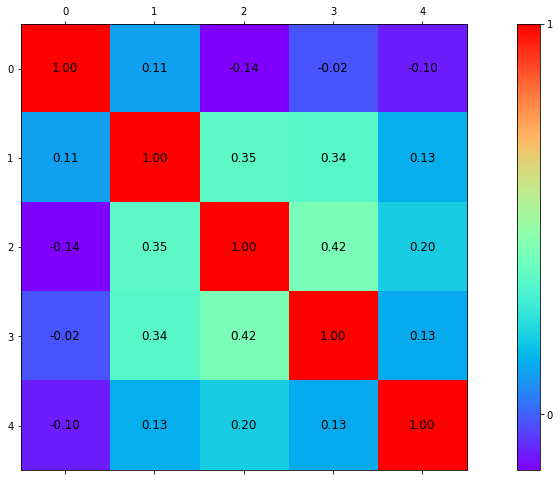

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
img = plt.matshow(cov_data,fignum=1, cmap=plt.cm.rainbow)
plt.colorbar(img, ticks = [-1, 0, 1], fraction=0.045)
for x in range(cov_data.shape[0]):
    for y in range(cov_data.shape[1]):
        plt.text(x, y, "%0.2f" % cov_data[x,y], size=12, color='black', ha="center", va="center")
        
plt.show()

In this matrix plot we see a strong correlation between 'last_evaluation', 'number_project', and 'average_montly_hours' features

**Computing Eigen Values**

In [14]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_data)
eigen_vals


#b=data.columns.values.tolist()                                                   # extract the features names and putting it onto a list
b=features
feat_dict = {b[x]: eigen_vals[x] for x in range(len(eigen_vals))}                # Making a dictionnary : The Keys are the features and values are the eigenvals

dict1 = feat_dict                                                                # Sorting the dictionary prior to eigenvals and keep features on index to better 
sorted_dict = {}                                                                 # Visualization later and know every couple (eigenval,feature) dor the PCA choose
sorted_keys = sorted(feat_dict, key=feat_dict.get, reverse=True) 

for w in sorted_keys:
    sorted_dict[w] = feat_dict[w]

sorted_dict

{'satisfaction_level': 1.8296465785482645,
 'last_evaluation': 1.1091313896296269,
 'number_project': 0.8771218964505345,
 'time_spend_company': 0.6350153901788773,
 'average_montly_hours': 0.5490847451926961}

The eigen value gives an idea about the variance of data
Here i sorted the eigen values to show the more powerful components

**Computing Eigen Vectors**

In [15]:
eigen_vecs

array([[-0.08688429, -0.83127011,  0.3820556 , -0.28524747, -0.27222882],
       [ 0.50740199, -0.36996992,  0.04741566,  0.30553046,  0.71419072],
       [ 0.57907693,  0.11257602, -0.20954619, -0.77977926, -0.00559089],
       [ 0.54928085, -0.12457178, -0.25376183,  0.46267183, -0.63585544],
       [ 0.31297732,  0.37936893,  0.86225321,  0.05625046, -0.10714332]])

for each eigen value corresponds an eigen vector 

**PCA Selection**

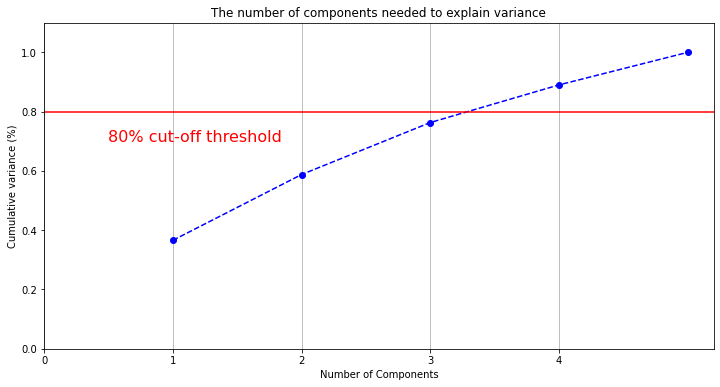

In [16]:
from sklearn.decomposition import PCA
pca = PCA().fit(x_standardized)


import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1,6, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0,5, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.8, color='r', linestyle='-')
plt.text(0.5, 0.70, '80% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

This part of script is written to select the 'features' who explain 80% of the variance of data 

In [17]:
pca.explained_variance_ratio_

array([0.36592932, 0.22182628, 0.17542438, 0.12700308, 0.10981695])

In [18]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

eigen_pairs

[(1.8296465785482645,
  array([-0.08688429,  0.50740199,  0.57907693,  0.54928085,  0.31297732])),
 (1.1091313896296269,
  array([-0.83127011, -0.36996992,  0.11257602, -0.12457178,  0.37936893])),
 (0.8771218964505345,
  array([ 0.3820556 ,  0.04741566, -0.20954619, -0.25376183,  0.86225321])),
 (0.6350153901788773,
  array([-0.27222882,  0.71419072, -0.00559089, -0.63585544, -0.10714332])),
 (0.5490847451926961,
  array([-0.28524747,  0.30553046, -0.77977926,  0.46267183,  0.05625046]))]

In [19]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis],eigen_pairs[2][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.08688429 -0.83127011  0.3820556 ]
 [ 0.50740199 -0.36996992  0.04741566]
 [ 0.57907693  0.11257602 -0.20954619]
 [ 0.54928085 -0.12457178 -0.25376183]
 [ 0.31297732  0.37936893  0.86225321]]


In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principal_components=pca.fit_transform(x_standardized)
principalDF=pd.DataFrame(data=data2, columns= ['satisfaction_level', 'last_evaluation','number_project'])
principalDF

,satisfaction_level,last_evaluation,number_project
0,0.38,0.53,2
1,0.80,0.86,5
2,0.11,0.88,7
3,0.72,0.87,5
4,0.37,0.52,2
...,...,...,...
14994,0.40,0.57,2
14995,0.37,0.48,2
14996,0.37,0.53,2
14997,0.11,0.96,6


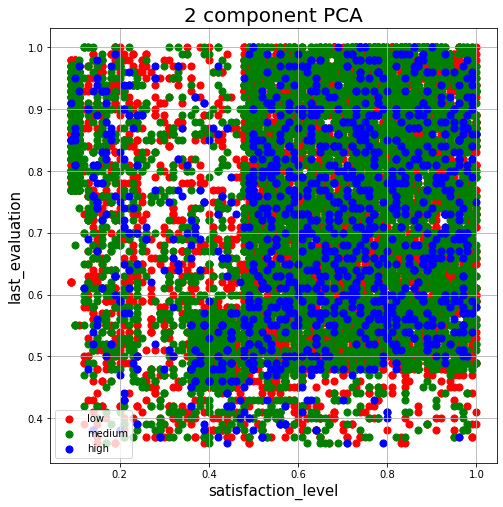

In [21]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('satisfaction_level', fontsize = 15)
ax.set_ylabel('last_evaluation', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['low','medium', 'high']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = data['salary'] == target
    ax.scatter(data.loc[indicesToKeep, 'satisfaction_level']
               , data.loc[indicesToKeep, 'last_evaluation']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()